In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis = 0)
train_data = train_data - mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data = train_data /std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]

test_data -= mean
test_data /= std

train_data.shape[1]

13

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

model = keras.Sequential()
model.add(layers.Input(shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'relu'))

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]

model.compile(
    loss = 'mse',
    optimizer = 'Adam',
    metrics = ['mae'])

history = model.fit(train_data, train_labels,
        epochs = 70,
        validation_split=0.2)

Epoch 1/70
11/11 [==============================] - 2s 55ms/step - loss: 557.9410 - mae: 21.7396 - val_loss: 604.5566 - val_mae: 22.7696
Epoch 2/70
11/11 [==============================] - 0s 9ms/step - loss: 511.8910 - mae: 20.5969 - val_loss: 548.8156 - val_mae: 21.5129
Epoch 3/70
11/11 [==============================] - 0s 14ms/step - loss: 454.9839 - mae: 19.1742 - val_loss: 479.6822 - val_mae: 19.8774
Epoch 4/70
11/11 [==============================] - 0s 11ms/step - loss: 385.1890 - mae: 17.2631 - val_loss: 392.8972 - val_mae: 17.6483
Epoch 5/70
11/11 [==============================] - 0s 10ms/step - loss: 299.6132 - mae: 14.8405 - val_loss: 293.2742 - val_mae: 14.8334
Epoch 6/70
11/11 [==============================] - 0s 17ms/step - loss: 210.9668 - mae: 12.1422 - val_loss: 194.6497 - val_mae: 11.7910
Epoch 7/70
11/11 [==============================] - 0s 12ms/step - loss: 130.8698 - mae: 9.4135 - val_loss: 115.2686 - val_mae: 8.5785
Epoch 8/70
11/11 [==========================

<ipython-input-6-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


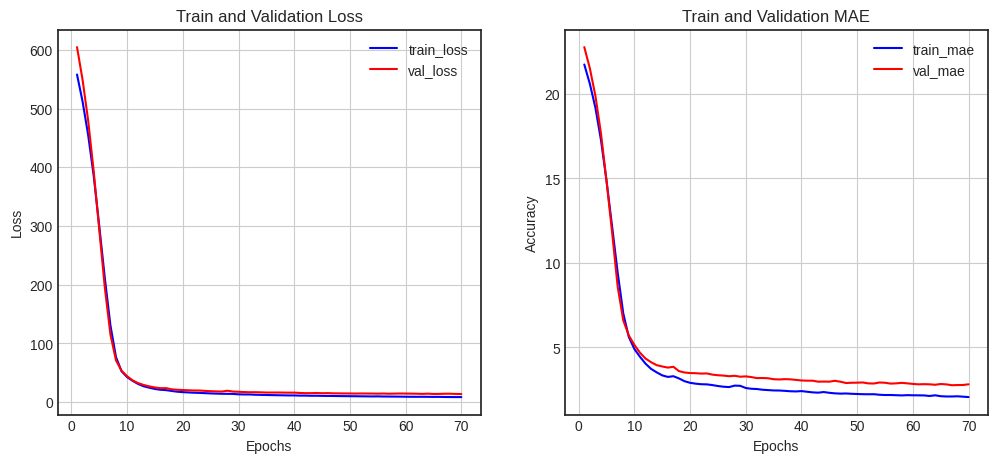

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 8ms/step - loss: 24.3270 - mae: 3.1017


[24.327011108398438, 3.1016995906829834]